In [1]:
import os
import sys
sys.path.insert(0,'..')
import glob
import utils
import create_training_dataset
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from tensorflow import keras
import pickle

2022-11-17 12:12:44.155217: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-17 12:12:44.381413: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-17 12:12:44.437410: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-17 12:12:45.410872: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [2]:
print(os.getcwd())

/home/hegelim/workspace/adl


In [3]:
zoom1_normal_mask = "training/zoom1/masks/normal"
zoom1_tumor_mask = "training/zoom1/masks/tumor"
zoom2_normal_mask = "training/zoom2/masks/normal"
zoom2_tumor_mask = "training/zoom2/masks/tumor"

In [4]:
zoom1_normal_mask_npy = glob.glob(f"{zoom1_normal_mask}/*.npy")
zoom1_tumor_mask_npy = glob.glob(f"{zoom1_tumor_mask}/*.npy")
zoom2_normal_mask_npy = glob.glob(f"{zoom2_normal_mask}/*.npy")
zoom2_tumor_mask_npy = glob.glob(f"{zoom2_tumor_mask}/*.npy")
print(len(zoom1_normal_mask_npy))
print(len(zoom1_tumor_mask_npy))
print(len(zoom2_normal_mask_npy))
print(len(zoom2_tumor_mask_npy))

8000
6557
8000
6557


In [5]:
def whether_all_normal_passed(sample_size: int, files: list) -> bool:
    count = 0
    all_passed = True
    for i in tqdm(range(sample_size)):
        mask = np.load(files[i])
        if utils.has_tumor_at_center(mask):
            count += 1
            all_passed = False
    return all_passed, count

def whether_all_tumor_passed(sample_size: int, files: list) -> bool:
    all_passed = True
    for i in tqdm(range(sample_size)):
        mask = np.load(files[i])
        if not utils.has_tumor_at_center(mask):
            print(files[i])
            all_passed = False
            break
    return all_passed

In [6]:
sample_size = len(zoom1_normal_mask_npy)
all_passed, count = whether_all_normal_passed(sample_size, zoom1_normal_mask_npy)
print(f"Zoom level 1 normal pieces all passed: {all_passed}")
print(f"Count of non-passed: {count}")

  0%|          | 0/8000 [00:00<?, ?it/s]

Zoom level 1 normal pieces all passed: True
Count of non-passed: 0


In [7]:
sample_size = len(zoom1_tumor_mask_npy)
all_passed = whether_all_tumor_passed(sample_size, zoom1_tumor_mask_npy)
print(f"Zoom level 1 tumor pieces all passed: {all_passed}")

  0%|          | 0/6557 [00:00<?, ?it/s]

Zoom level 1 tumor pieces all passed: True


In [8]:
sample_size = len(zoom2_normal_mask_npy)
all_passed, count = whether_all_normal_passed(sample_size, zoom2_normal_mask_npy)
print(f"Zoom level 2 normal pieces all passed: {all_passed}")
print(f"Count of non-passed: {count}")

  0%|          | 0/8000 [00:00<?, ?it/s]

Zoom level 2 normal pieces all passed: False
Count of non-passed: 463


In [9]:
sample_size = len(zoom2_tumor_mask_npy)
all_passed = whether_all_tumor_passed(sample_size, zoom2_tumor_mask_npy)
print(f"Zoom level 2 tumor pieces all passed: {all_passed}")

  0%|          | 0/6557 [00:00<?, ?it/s]

Zoom level 2 tumor pieces all passed: True


In [10]:
training_gen, val_gen, train_len, val_len = create_training_dataset.create_train_val_dataset()

Found 11646 images belonging to 2 classes.
Found 2911 images belonging to 2 classes.
Found 11646 images belonging to 2 classes.
Found 2911 images belonging to 2 classes.


2022-11-17 12:13:55.344911: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-17 12:13:55.425376: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-17 12:13:55.426556: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-17 12:13:55.427633: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow 

tf.Tensor([1.], shape=(1,), dtype=float32)


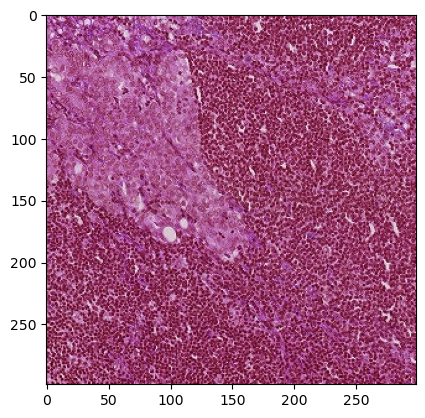

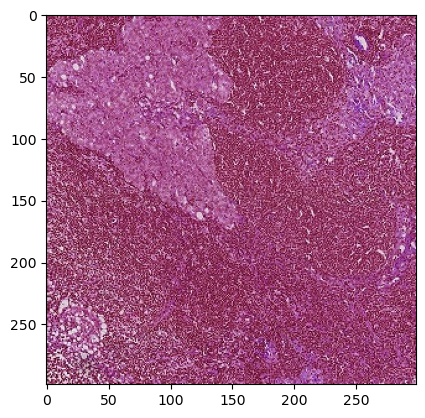

In [11]:
im_batch, label = next(training_gen)
plt.figure()
plt.imshow(im_batch[0][0])
plt.figure()
plt.imshow(im_batch[1][0])
print(label[0])

### Evaluate Model

In [13]:
mymodel = keras.models.load_model('checkpoints/mymodel_11_9.h5')

2022-11-09 19:33:17.520230: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-09 19:33:17.607752: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-09 19:33:17.608908: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-09 19:33:17.610218: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow 

In [16]:
with open("history/mymodel_11_9_train_history", "rb") as f:
    history = pickle.load(f)

In [17]:
history

{'loss': [0.033375415951013565,
  0.15485015511512756,
  9.611955642700195,
  0.0013643507845699787,
  17.325111389160156,
  0.024496497586369514,
  3.9488723278045654,
  0.2557818591594696,
  1.4242697954177856,
  0.48265552520751953,
  0.8560599088668823,
  0.6006706357002258,
  0.7631542682647705,
  0.4639433026313782,
  0.8670578598976135,
  0.6153205633163452,
  0.750416100025177,
  0.45864617824554443,
  0.8713144063949585,
  0.6190279722213745],
 'accuracy': [0.5769230723381042,
  0.9859203100204468,
  0.9773351550102234,
  0.9979381561279297,
  0.8361950516700745,
  0.8997252583503723,
  0.2366071492433548,
  0.38213059306144714,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'auc': [0.0,
  0.0,
  0.9947407841682434,
  0.0,
  0.0,
  0.0,
  0.9965660572052002,
  0.0,
  0.0,
  0.0,
  0.925430417060852,
  0.0,
  0.0,
  0.0,
  0.9261082410812378,
  0.0,
  0.0,
  0.0,
  0.9273508787155151,
  0.0],
 'recall': [0.0,
  0.0,
  0.9785959124565125,
 